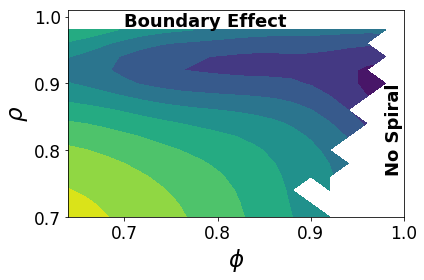

In [33]:
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn
import seaborn


phis= [i/100  for i in range( 64, 101, 2 ) ]
rhos= [i/100 for i in range(70, 101, 2)]
delta=10**(-10);
tau=9
DPhi=0.02

ColMap=np.array([ [0, 1, 0], 
                 [0, 0, 1],
                 [0, 1, 1],
                  [1, 0, 0],
                  [ 1, 0, 1],
                 [1, 1, 0]                  
                  
                 ]);

NumRep=1000;

#labels=[r'$normal$',r'$\rho=0.9$',r'$\tau=18$',r'$\tau_{off}=2.5$']
#names=['Phi_Rho95Tau9.dat','Phi_Rho90Tau9.dat','Phi_Rho95Tau18.dat','Phi_Rho95Tau9Tauoff25.dat']


PhisPlot=np.arange(0.64, 1+delta, DPhi)
periods= np.zeros( (len(rhos), len(phis) ) )
periods_se= np.zeros( (len(rhos), len(phis) ) )
NumSam= np.zeros(  (len(rhos), len(phis) )  )

for irho in range( len(rhos) ):
    PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau9.dat")
    PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_Period_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau9.dat")
    PhiData=PhiData.flatten()
    PerData=PerData.flatten()

    for iphi,phi in enumerate(PhisPlot):
        PerPhi=PerData[(phi-DPhi/2 <= PhiData)*(PhiData< phi+ DPhi/2)]
        PerPhiEff=PerPhi[PerPhi> 0]
        if len(PerPhiEff):
            periods[irho, iphi]=np.mean(PerPhiEff);
            periods_se[irho, iphi]=np.std(PerPhiEff)/np.sqrt(len(PerPhiEff) );
            NumSam[irho, iphi]= len(PerPhiEff);
            
devs= np.zeros( (len(rhos), len(phis) ) )
for irho in range( len(rhos) ):
    for iphi in range( len(phis) ):
        rho= rhos[irho]
        phi= phis[iphi]
        if periods[irho, iphi]< 1:
            devs[irho, iphi]= -float("inf")
        else:
            per_pre= 2/1.800*( 2/(1-rho)/ phi -1)
            devs[irho, iphi]= np.log10( (periods[irho, iphi]- per_pre)**2  )  #plot the squared error
            
            
#use Gaussian filter to smooth it
#1. get the weight map
#2. normalize the weight
#3. get weighted average
sigma= 2
devs1= np.zeros( (len(rhos), len(phis) ) )
for i in range( len(devs) ):
    for j in range( len(devs[0]) ):
        if devs[i,j]== -float('inf'):
            devs1[i,j]= devs[i,j]
            continue
            
        weights= np.zeros( devs.shape )
        sum_weights= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weights[m][n]= np.exp( -( (i-m)**2+ (j-n)**2 )/(2*sigma*sigma) )
                    sum_weights+= weights[m][n]
        weights/= sum_weights
        
        weighted_sum= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weighted_sum+= (weights[m,n]* devs[m,n] )
        devs1[i,j]= weighted_sum
            
PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.7, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.98, 0.88, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
plt.ylim( [0.7, 1.01] )

#cbar= fig.colorbar(CS, orientation= "horizontal")
#cbar= fig.colorbar(CS)
#cbar.set_ticks( [2, 3] )
#cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
#cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 270, size= 17)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.7, 0.8, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

plt.xlabel(r'$\phi$', fontsize=23)
plt.ylabel(r'$\rho$', fontsize=23)
plt.tight_layout()

plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_Spi11_Sigma2_Phi64Rho70.png", dpi=500)
plt.show()
#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

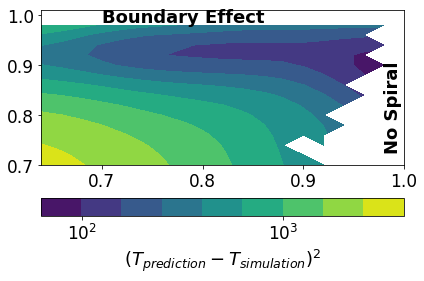

In [32]:
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn
import seaborn


phis= [i/100  for i in range( 64, 101, 2 ) ]
rhos= [i/100 for i in range(70, 101, 2)]
delta=10**(-10);
tau=9
DPhi=0.02

ColMap=np.array([ [0, 1, 0], 
                 [0, 0, 1],
                 [0, 1, 1],
                  [1, 0, 0],
                  [ 1, 0, 1],
                 [1, 1, 0]                  
                  
                 ]);

NumRep=1000;

#labels=[r'$normal$',r'$\rho=0.9$',r'$\tau=18$',r'$\tau_{off}=2.5$']
#names=['Phi_Rho95Tau9.dat','Phi_Rho90Tau9.dat','Phi_Rho95Tau18.dat','Phi_Rho95Tau9Tauoff25.dat']


PhisPlot=np.arange(0.64, 1+delta, DPhi)
periods= np.zeros( (len(rhos), len(phis) ) )
periods_se= np.zeros( (len(rhos), len(phis) ) )
NumSam= np.zeros(  (len(rhos), len(phis) )  )

for irho in range( len(rhos) ):
    PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau9.dat")
    PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_Period_Phi_Rho"+ str( int(rhos[irho]* 100+0.5) ) +"Tau9.dat")
    PhiData=PhiData.flatten()
    PerData=PerData.flatten()

    for iphi,phi in enumerate(PhisPlot):
        PerPhi=PerData[(phi-DPhi/2 <= PhiData)*(PhiData< phi+ DPhi/2)]
        PerPhiEff=PerPhi[PerPhi> 0]
        if len(PerPhiEff):
            periods[irho, iphi]=np.mean(PerPhiEff);
            periods_se[irho, iphi]=np.std(PerPhiEff)/np.sqrt(len(PerPhiEff) );
            NumSam[irho, iphi]= len(PerPhiEff);
            
devs= np.zeros( (len(rhos), len(phis) ) )
for irho in range( len(rhos) ):
    for iphi in range( len(phis) ):
        rho= rhos[irho]
        phi= phis[iphi]
        if periods[irho, iphi]< 1:
            devs[irho, iphi]= -float("inf")
        else:
            per_pre= 2/1.800*( 2/(1-rho)/ phi -1)
            devs[irho, iphi]= np.log10( (periods[irho, iphi]- per_pre)**2  )
            
            
#use Gaussian filter to smooth it
#1. get the weight map
#2. normalize the weight
#3. get weighted average
sigma= 2
devs1= np.zeros( (len(rhos), len(phis) ) )
for i in range( len(devs) ):
    for j in range( len(devs[0]) ):
        if devs[i,j]== -float('inf'):
            devs1[i,j]= devs[i,j]
            continue
            
        weights= np.zeros( devs.shape )
        sum_weights= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weights[m][n]= np.exp( -( (i-m)**2+ (j-n)**2 )/(2*sigma*sigma) )
                    sum_weights+= weights[m][n]
        weights/= sum_weights
        
        weighted_sum= 0
        for m in range( len(devs) ):
            for n in range( len(devs[0] ) ):
                if devs[m][n]> -float('inf'):
                    weighted_sum+= (weights[m,n]* devs[m,n] )
        devs1[i,j]= weighted_sum
            
PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.7, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.98, 0.88, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
plt.ylim( [0.7, 1.01] )

#cbar= fig.colorbar(CS, orientation= "horizontal")
#cbar= fig.colorbar(CS)
#cbar.set_ticks( [2, 3] )
#cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
#cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 270, size= 17)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.7, 0.8, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

#plt.xlabel(r'$\phi$', fontsize=23)
#plt.ylabel(r'$\rho$', fontsize=23)

cbar= fig.colorbar(CS, orientation= "horizontal")
cbar.set_ticks( [2, 3] )
cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
cbar.ax.tick_params( labelsize= 17)

cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 0, size= 18)

plt.tight_layout()

plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_Spi11_Sigma2_Phi64Rho70_CB.png", dpi=500)
plt.show()
#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

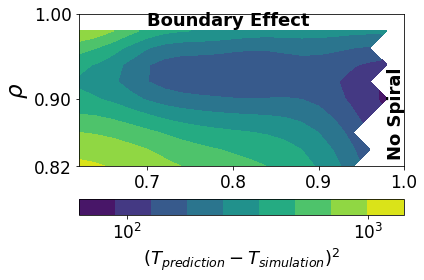

In [114]:
PHIS, RHOS= np.meshgrid( phis, rhos)
fig, ax= plt.subplots()
CS= ax.contourf(PHIS, RHOS, devs1)
plt.text(0.7, 0.986, 'Boundary Effect', fontsize=18, fontweight= 'bold')
plt.text(0.98, 0.92, 'No Spiral', rotation=90, fontsize= 18, fontweight= 'bold')
#plt.text(0.85, 0.90, r'$Low$', fontsize= 18, fontweight= "bold")
#plt.text(0.62, 0.97, r'$High$', fontsize= 18, fontweight= "bold")
#plt.text(0.75, 0.85, r'$Medium$', fontsize= 18, fontweight= "bold")

#plt.xlim( [0.6, 1.02])
#plt.ylim( [0.82, 1.01] )

cbar= fig.colorbar(CS, orientation= "horizontal")
cbar.set_ticks( [2, 3] )
cbar.set_ticklabels( [r"$10^{2}$", r"$10^{3}$"] )
cbar.ax.tick_params( labelsize= 17)

cbar.set_label(r"$(T_{prediction} - T_{simulation})^{2}$", rotation= 0, size= 18)
#plt.cticks( fontsize= 17)

ax.set_xticks( [0.7, 0.8, 0.9, 1.0] )
#ax.set_xticklabels( xlabels )
ax.set_yticks( [0.82, 0.90, 1] )
plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

#plt.xlabel(r'$\phi$', fontsize=23)
plt.ylabel(r'$\rho$', fontsize=23)
plt.tight_layout()
plt.savefig("/home/xiaoling/SpiralWave/PapFig/HM_Dev-PhiActRho_Spi11_Sigma2_Phi64_CB.png", dpi=500)

#ax.set_yticklabels( ylabels )  #xtick, xticklabels
#ax.clabel(CS, inline=1, fontsize=10)
#fig.colorbar( CS ) 

Text(0, 0.5, '$\\rho$')

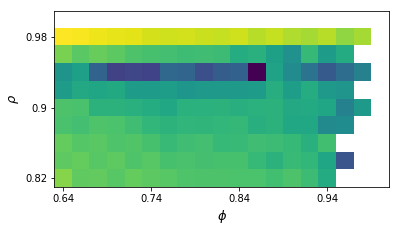

In [22]:
fig, ax= plt.subplots() #initiate fig and axis

#cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
#                  cmap='gray', extend='both', alpha=0.5)
im= ax.imshow( devs, origin= 'lower' ) #initiate image
#im.set_clim(-2, 10)     #1. set collor limit
#fig.colorbar( im )      #1. colorbar
xs= [0, 5, 10, 15]
xlabels= [ str( phis[x] ) for x in xs]

ys= [0, 4, 8]
ylabels= [ str(rhos[y]) for y in ys]
ax.set_xticks( xs )
ax.set_xticklabels( xlabels )

ax.set_yticks( ys )
ax.set_yticklabels( ylabels )  #xtick, xticklabels

ax.set_xlabel(r'$\phi$', fontsize= 13)
ax.set_ylabel(r'$\rho$', fontsize= 13)

# create a legend for the contour set
#artists, labels = cs.legend_elements()
#ax2.legend(artists, labels, handleheight=2)

#plt.savefig("/home/xiaoling/SpiralWave/PapFig/Image_Dev_PhiRho_Spi11.png", dpi=500)

Text(0, 0.5, '$\\rho$')

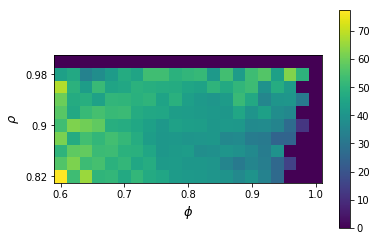

In [20]:
fig, ax= plt.subplots() #initiate fig and axis

#cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
#                  cmap='gray', extend='both', alpha=0.5)
im= ax.imshow( periods, origin= 'lower' ) #initiate image
#im.set_clim(20, 80)     #1. set collor limit
fig.colorbar( im )      #1. colorbar
xs= [0, 5, 10, 15, 20]
xlabels= [ str( phis[x] ) for x in xs]

ys= [0, 4, 8]
ylabels= [ str(rhos[y]) for y in ys]
ax.set_xticks( xs )
ax.set_xticklabels( xlabels )

ax.set_yticks( ys )
ax.set_yticklabels( ylabels )  #xtick, xticklabels

ax.set_xlabel(r'$\phi$', fontsize= 13)
ax.set_ylabel(r'$\rho$', fontsize= 13)

# create a legend for the contour set
#artists, labels = cs.legend_elements()
#ax2.legend(artists, labels, handleheight=2)

#plt.savefig("/home/xiaoling/SpiralWave/PapFig/Image_Per_PhiRho_Spi11.png", dpi=500)

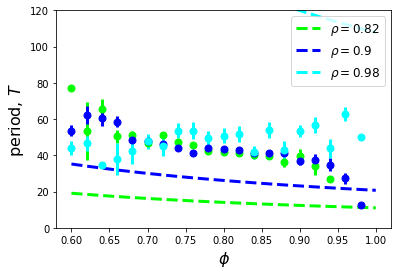

In [44]:
plt.figure()
for k in [0, 4, 8]:
    plt.errorbar(PhisPlot[ periods[k,:]>0], periods[k,:][periods[k,:]>0], periods_se[k,:][periods[k,:]>0],linestyle='', linewidth=3, marker='o',
    markersize=7,color=ColMap[k//4,:])
    #plt.plot(phis, PeriodSet[k,:], linestyle='-.', linewidth=3, color=ColMap[2,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    #line2,=plt.plot(x,x**1.5, linestyle='-', color=(1,0,0), linewidth=4, marker='^',
    # markerfacecolor='blue', markeredgecolor='r', markersize=12, label='example 2')

        
rho=0.82
T_pre=2/1.8367*( 2/(1-rho)/PhisPlot -1)
plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[0, :], label=r'$\rho=0.82$' )

rho=0.90
T_pre=2/1.8367*( 2/(1-rho)/PhisPlot -1)
plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[1, :], label=r'$\rho=0.9$' )

rho=0.98
T_pre=2/1.8367*( 2/(1-rho)/PhisPlot -1)
plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[2, :], label=r'$\rho=0.98$' )

#plt.plot(np.arange(5, 40,0.5), 10+1.4*np.arange(5, 40,0.5), linestyle='--', linewidth=3, label='predicted')
plt.legend(loc="upper right", fontsize=12)     

#plt.axis([0, 12, 0, 120])
plt.ylim( (0,120))
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'period, $T$', fontsize=16)

#plt.text(PhisPlot[np.isclose(PhisPlot,0.5)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.5)][0]-10, 'F', fontsize=14, fontweight='bold')
#plt.text(PhisPlot[np.isclose(PhisPlot,0.96)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.96)][0]-10, 'G',fontsize=14,fontweight= 'bold')

#plt.text(0.35, 120, "E", {'color': 'k', 'fontsize': 20, 'fontweight': 'bold'},
#          horizontalalignment='left',
#         verticalalignment='top',
#         rotation=0,
#         clip_on=False)
         #transform=plt.gca().transAxes)
#plt.title(r"$\rho=0.95$", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=30
#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])
plt.savefig("/home/xiaoling/SpiralWave/PapFig/Lin_Per_PhiAct_Rho82Tau_Spi11.png", dpi=500)

plt.show()

In [42]:
periods.shape

(10, 21)

In [12]:
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn

delta=10**(-10);
tau=9
DPhi=0.02

ColMap=np.array([ [0, 1, 0], 
                 [0, 0, 1],
                 [0, 1, 1],
                  [1, 0, 0],
                  [ 1, 0, 1],
                 [1, 1, 0]                  
                  
                 ]);
phis=np.arange(0.42, 0.98+delta, 0.02)
NumRep=1000;

labels=[r'$normal$',r'$\rho=0.9$', r'$\rho=0.975$', r'$\tau=18$',r'$\tau_{off}=2.5$']
names=['Phi_Rho95Tau9.dat','Phi_Rho90Tau9.dat','Phi_Rho975Tau9C10.dat', 'Phi_Rho95Tau18.dat','Phi_Rho95Tau9Tauoff25.dat']


PhisPlot=np.arange(0.38, 1+delta, DPhi)
PeriodPlot=np.zeros( (len(names), len(PhisPlot)) )
PeriodSE=np.zeros( (len(names), len(PhisPlot)) )
NumSam=np.zeros( (len(names), len(PhisPlot)) )

for i in range( len(names) ):
    PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_"+ names[i])
    PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_Period_"+ names[i])
    PhiData=PhiData.flatten()
    PerData=PerData.flatten()

    for j,phi in enumerate(PhisPlot):
        PerPhi=PerData[(phi-DPhi/2 <= PhiData)*(PhiData< phi+ DPhi/2)]
        PerPhiEff=PerPhi[PerPhi> 0]
        if len(PerPhiEff):
            PeriodPlot[i,j]=np.mean(PerPhiEff);
            PeriodSE[i,j]=np.std(PerPhiEff)/np.sqrt(len(PerPhiEff) );
            NumSam[i,j]= len(PerPhiEff);
            

In [16]:
NumSam[:, :]

array([[  0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   4.,   4.,   3.,
          7.,  18.,  14.,  27.,  37.,  47.,  61.,  62.,  89.,  89., 132.,
         88.,  98.,  88.,  64.,  50.,  38.,  23.,   6.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   2.,   1.,   2.,
          8.,  13.,  30.,  38.,  78., 109., 144., 179., 184., 225., 187.,
        167., 124., 102.,  53.,  33.,  21.,   7.,   5.,   1.,   0.],
       [  0.,   1.,   2.,   0.,   2.,   2.,   2.,   2.,   1.,   6.,   5.,
          5.,   3.,   8.,  10.,  12.,  16.,  17.,  23.,  34.,  34.,  34.,
         36.,  34.,  28.,  34.,  24.,  24.,  17.,   7.,   0.,   0.],
       [  7.,  17.,  27.,  31.,  51.,  67.,  77.,  86., 107., 104., 137.,
        121., 110., 128.,  98., 122.,  77.,  71.,  59.,  65.,  33.,  28.,
         19.,  21.,   8.,  10.,   6.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   2.,
          0.,   1.,   3.,   5.,   5.,  15.,  18.,   8.,  1

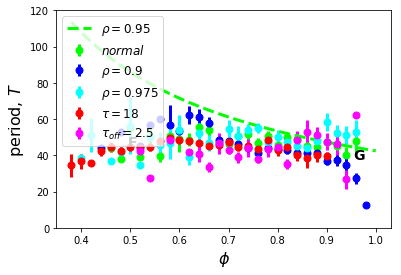

In [14]:
plt.figure()
for k in range( len(names) ):
    plt.errorbar(PhisPlot[PeriodPlot[k,:]>0], PeriodPlot[k,:][PeriodPlot[k,:]>0], PeriodSE[k,:][PeriodPlot[k,:]>0],linestyle='', linewidth=3, marker='o',
    markersize=7,color=ColMap[k,:], label= labels[k])
    #plt.plot(phis, PeriodSet[k,:], linestyle='-.', linewidth=3, color=ColMap[2,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    #line2,=plt.plot(x,x**1.5, linestyle='-', color=(1,0,0), linewidth=4, marker='^',
    # markerfacecolor='blue', markeredgecolor='r', markersize=12, label='example 2')

        
rho=0.95
T_pre=2/1.8367*( 2/(1-rho)/PhisPlot -1)
plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[0, :], label=r'$\rho=0.95$' )

#rho=0.9
#T_pre=2/1.8367*( 2/(1-rho)/PhisPlot -1)
#plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[1, :], label=r'$\rho=0.9$' )

#rho=0.975
#T_pre=2/1.8367*( 2/(1-rho)/PhisPlot -1)
#plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[2, :], label=r'$\rho=0.975$' )

#plt.plot(np.arange(5, 40,0.5), 10+1.4*np.arange(5, 40,0.5), linestyle='--', linewidth=3, label='predicted')
plt.legend(loc="upper left", fontsize=12)     

#plt.axis([0, 12, 0, 120])
plt.ylim( (0,120))
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'period, $T$', fontsize=16)

plt.text(PhisPlot[np.isclose(PhisPlot,0.5)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.5)][0]-10, 'F', fontsize=14, fontweight='bold')
plt.text(PhisPlot[np.isclose(PhisPlot,0.96)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.96)][0]-10, 'G',fontsize=14,fontweight= 'bold')

#plt.text(0.35, 120, "E", {'color': 'k', 'fontsize': 20, 'fontweight': 'bold'},
#          horizontalalignment='left',
#         verticalalignment='top',
#         rotation=0,
#         clip_on=False)
         #transform=plt.gca().transAxes)
#plt.title(r"$\rho=0.95$", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=30
#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])
plt.savefig("/home/xiaoling/SpiralWave/PapFig/Lin_Per_PhiAct_RhoTauCTauoff_Spi11.png", dpi=500)

plt.show()